# Setting up

In [2]:
# Importing the libraries 
library(tidyverse)
library(ggsignif)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
# reading data
data <- read_csv("biol331_data.csv")

Rows: 24 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): egg_label, egg_code, hh_Stage, embryo_area_mm2, eye_diameter_mm, bu...
dbl (4): wk, treatment, alive, post_exp_egg_weight

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
# data preview
head(data)

wk,treatment,egg_label,alive,egg_code,hh_Stage,embryo_area_mm2,eye_diameter_mm,bump_to_beak_length_mm,embryo_length_mm,pre_exp_egg_weight,post_exp_egg_weight,embryo_weight
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,0,1A,0,1-1A,n/a,n/a,n/a,n/a,n/a,n/a,57.67,n/a
1,0,1B,1,1-1B,29,143.374,5.335,11.31,27.179,n/a,54.06,0.81
1,0,1C,1,1-1C,29,154.968,5.287,11.873,26.491,n/a,51.63,0.91
1,0,1D,1,1-1D,30,120.004,4.595,10.135,23.468,n/a,60.08,0.82
1,48,2A,1,1-2A,30,119.195,4.063,9.887,24.819,n/a,50.47,0.64
1,48,2B,1,1-2B,30,134.437,4.595,11.206,24.739,n/a,48.89,0.57


In [5]:
# post-process
data$treatment <- as.factor(data$treatment)
# data$egg_label <- as.factor(data$egg_label)
data$alive <- as.factor(data$alive)
data$hh_Stage <- as.factor(data$hh_Stage)

# converting the <chr> to <dbl>
data$embryo_area_mm2 <- as.numeric(data$embryo_area_mm2)
data$eye_diameter_mm <- as.numeric(data$eye_diameter_mm)
data$bump_to_beak_length_mm <- as.numeric(data$bump_to_beak_length_mm)
data$embryo_length_mm <- as.numeric(data$embryo_length_mm)
data$pre_exp_egg_weight <- as.numeric(data$pre_exp_egg_weight)
data$embryo_weight <- as.numeric(data$embryo_weight)

# warning messages can be ignored. chr vars that are N/As are forcibly converted to NA
data

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


wk,treatment,egg_label,alive,egg_code,hh_Stage,embryo_area_mm2,eye_diameter_mm,bump_to_beak_length_mm,embryo_length_mm,pre_exp_egg_weight,post_exp_egg_weight,embryo_weight
<dbl>,<fct>,<chr>,<fct>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1A,0,1-1A,n/a,NA,NA,NA,NA,NA,57.67,NA
1,0,1B,1,1-1B,29,143.374,5.335,11.310,27.179,NA,54.06,0.81
1,0,1C,1,1-1C,29,154.968,5.287,11.873,26.491,NA,51.63,0.91
1,0,1D,1,1-1D,30,120.004,4.595,10.135,23.468,NA,60.08,0.82
1,48,2A,1,1-2A,30,119.195,4.063,9.887,24.819,NA,50.47,0.64
1,48,2B,1,1-2B,30,134.437,4.595,11.206,24.739,NA,48.89,0.57
1,48,2C,1,1-2C,29,162.930,5.375,10.267,29.976,NA,57.04,0.49
1,48,2D,1,1-2D,29,131.186,4.637,9.428,26.424,NA,55.43,0.41
1,168,3A,0,1-3A,n/a,NA,NA,NA,NA,NA,52.33,NA


# Exploration

Taking a look at the control (0) and the treatments (48, 160)
> Prolonged duration of the UV incubation, has reduced the sizes below (non-treatment columns excluding the embryo weight col)

Must do a statistical analysis to see if there is any significance in this reduction

In [6]:
mean_data_by_type <- data |> group_by(treatment) |> summarize(
                                        mean_embryo_area_mm2 = mean(embryo_area_mm2, na.rm = TRUE), 
                                        mean_eye_diameter_mm = mean(eye_diameter_mm, na.rm = TRUE),
                                        mean_bump_to_beak_length_mm = mean(bump_to_beak_length_mm, na.rm = TRUE),
                                        mean_embryo_length_mm = mean(embryo_length_mm, na.rm = TRUE),
                                        mean_embryo_weight = mean(embryo_weight, na.rm = TRUE),
                                        sd_embryo_area_mm2 = sd(embryo_area_mm2, na.rm = TRUE), 
                                        sd_eye_diameter_mm = sd(eye_diameter_mm, na.rm = TRUE),
                                        sd_bump_to_beak_length_mm = sd(bump_to_beak_length_mm, na.rm = TRUE),
                                        sd_embryo_length_mm = sd(embryo_length_mm, na.rm = TRUE),
                                        sd_embryo_weight = sd(embryo_weight, na.rm = TRUE)
                                        )
mean_data_by_type

treatment,mean_embryo_area_mm2,mean_eye_diameter_mm,mean_bump_to_beak_length_mm,mean_embryo_length_mm,mean_embryo_weight,sd_embryo_area_mm2,sd_eye_diameter_mm,sd_bump_to_beak_length_mm,sd_embryo_length_mm,sd_embryo_weight
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,138.0652,4.901500,10.99100,24.90400,0.7925000,14.80224,0.4806700,0.7597030,2.283401,0.1172959
48,133.7222,4.732167,10.35567,24.73533,0.5950000,15.76751,0.4302996,0.7066359,3.376884,0.1304990
168,118.6203,4.288667,10.18967,23.36633,0.6133333,21.30353,0.7020067,0.8832100,1.633013,0.2039281


Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set1 is 9
Returning the palette you asked for with that many colors
”
Warning message:
“Removed 3 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


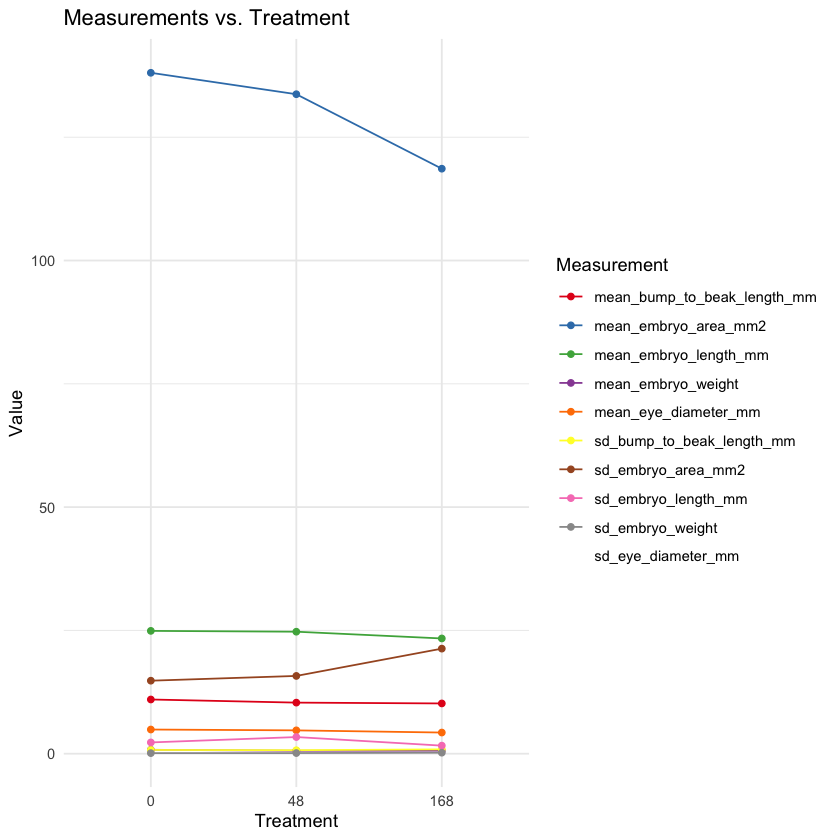

In [7]:
# Load necessary libraries
library(ggplot2)
library(tidyr)

# Assuming mean_data_by_type is your data frame
# mean_data_by_type <- data.frame(treatment = c(0, 48, 160),
#                                 mean_embryo_area_mm2 = c(138.0652, 133.7222, 118.6203),
#                                 mean_eye_diameter_mm = c(4.9015, 4.732167, 4.288667),
#                                 mean_bump_to_beak_length_mm = c(10.991, 10.35567, 10.18967),
#                                 mean_embryo_length_mm = c(24.904, 24.73533, 23.36633),
#                                 mean_embryo_weight = c(0.7925, 0.595, 0.6133333))

# Convert from wide to long format
long_data <- pivot_longer(mean_data_by_type, 
                          cols = -treatment, 
                          names_to = "Measurement", 
                          values_to = "Value")

# Generate the line graph
ggplot(long_data, aes(x = treatment, y = Value, color = Measurement, group = Measurement)) +
  geom_line() +
  geom_point() +
  theme_minimal() +
  labs(title = "Measurements vs. Treatment",
       x = "Treatment",
       y = "Value",
       color = "Measurement") +
  scale_color_brewer(palette = "Set1")


In [8]:
# seperating the data by the their type
control <- data |> filter(treatment == 0)
treatment1 <- data |> filter(treatment == 48)
treatment2 <- data |> filter(treatment == 168)

## alive contingency table

> cannot determine due to insufficent sample size in the contingency table (each entry must be >4)

In [9]:
table(data$treatment, data$alive)
chisq.test(table(data$treatment, data$alive))

     
      0 1
  0   4 4
  48  2 6
  168 2 6

Warning message in chisq.test(table(data$treatment, data$alive)):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(data$treatment, data$alive)
X-squared = 1.5, df = 2, p-value = 0.4724


## fisher's exact test on treatment and alive

The p-value is higher than 0.05 so the null hypothesis is rejected therefore:
>  there isn't statistically significant evidence to suggest an association between the treatment and the outcome of being alive

In [10]:
fisher.test(table(data$treatment, data$alive))


	Fisher's Exact Test for Count Data

data:  table(data$treatment, data$alive)
p-value = 0.6418
alternative hypothesis: two.sided


## corrolation matrix

Warning message in cor(numeric_data, use = "complete.obs"):
“the standard deviation is zero”


,wk,embryo_area_mm2,eye_diameter_mm,bump_to_beak_length_mm,embryo_length_mm,pre_exp_egg_weight,post_exp_egg_weight,embryo_weight
wk,1,NA,NA,NA,NA,NA,NA,NA
embryo_area_mm2,NA,1.0000000,0.8120049,0.9731805,-0.5089057,0.6353316,0.6251934,0.8192687
eye_diameter_mm,NA,0.8120049,1.0000000,0.8156074,-0.6200004,0.4773104,0.4565363,0.9863162
bump_to_beak_length_mm,NA,0.9731805,0.8156074,1.0000000,-0.4445587,0.5938423,0.5854017,0.8327707
embryo_length_mm,NA,-0.5089057,-0.6200004,-0.4445587,1.0000000,-0.7612517,-0.7590918,-0.5868656
pre_exp_egg_weight,NA,0.6353316,0.4773104,0.5938423,-0.7612517,1.0000000,0.9993894,0.5300872
post_exp_egg_weight,NA,0.6251934,0.4565363,0.5854017,-0.7590918,0.9993894,1.0000000,0.5081142
embryo_weight,NA,0.8192687,0.9863162,0.8327707,-0.5868656,0.5300872,0.5081142,1.0000000


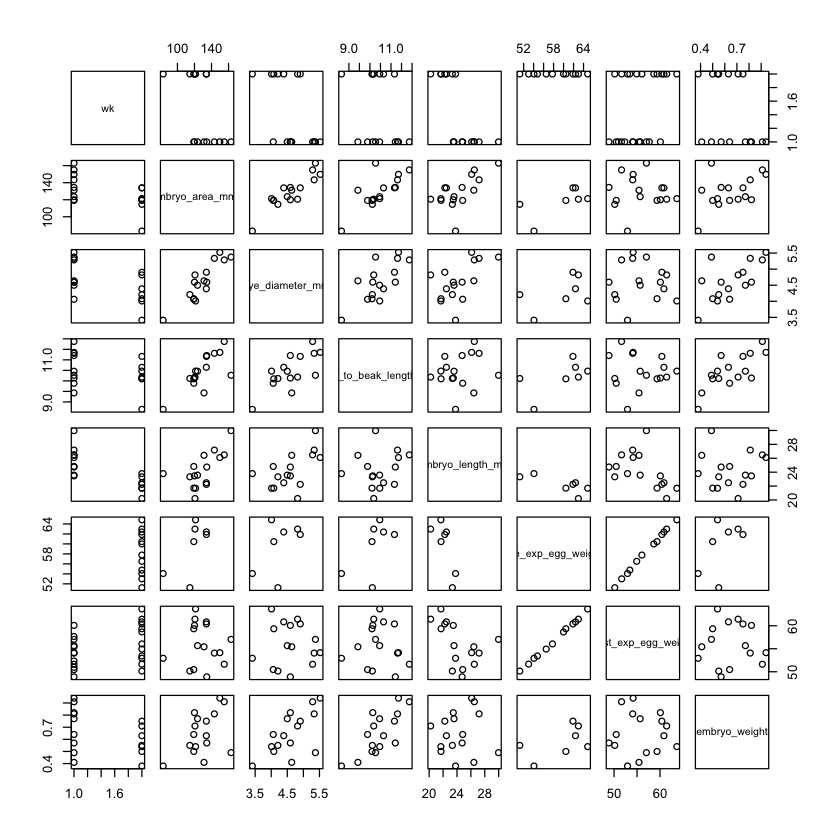

In [11]:
numeric_data <- data[sapply(data, is.numeric)]

# Compute the correlation matrix
cor(numeric_data, use = "complete.obs")  # 'use' argument handles missing values

# Visualize the correlation matrix with a pairs plot
pairs(numeric_data)

## embryo_area_mm2

### is the data normally distributed?

Since the p Value is not less that the significane level of 0.05, we don’t reject the null hypothesis. Therefore, the tested sample is confirmed to follow a normal distribution (thou, we already know that!).
> Control and treatment 1 and treatment 2 **are normally distributed.** 

In [12]:
shapiro.test(control$embryo_area_mm2)
shapiro.test(treatment1$embryo_area_mm2)
shapiro.test(treatment2$embryo_area_mm2)


	Shapiro-Wilk normality test

data:  control$embryo_area_mm2
W = 0.99724, p-value = 0.9908



	Shapiro-Wilk normality test

data:  treatment1$embryo_area_mm2
W = 0.83658, p-value = 0.1221



	Shapiro-Wilk normality test

data:  treatment2$embryo_area_mm2
W = 0.91133, p-value = 0.4452


### ANOVA for embryo_area_mm2
the high p-value>0.05 shows that 
> there is no statistically significant difference in the means across the groups represented in your 'treatment' variable

In [13]:
# alive_data <- filter(data, alive == "Alive")
# # alive_data
# model <- aov(embryo_area_mm2 ~ treatment, data = alive_data)
# summary(model)

### t.test for embryo_area_mm2
> there is no statistically significant difference in the embryo area (mm^2) between the control and treatment groups

In [14]:
t.test(control$embryo_area_mm2, treatment1$embryo_area_mm2, paired = FALSE)
t.test(control$embryo_area_mm2, treatment2$embryo_area_mm2, paired = FALSE)


	Welch Two Sample t-test

data:  control$embryo_area_mm2 and treatment1$embryo_area_mm2
t = 0.44277, df = 6.8899, p-value = 0.6715
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -18.92639  27.61256
sample estimates:
mean of x mean of y 
 138.0652  133.7222 



	Welch Two Sample t-test

data:  control$embryo_area_mm2 and treatment2$embryo_area_mm2
t = 1.7027, df = 7.9314, p-value = 0.1274
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6.929353 45.819186
sample estimates:
mean of x mean of y 
 138.0652  118.6203 


### Wilcox test for embryo_area_mm2
> there is no statistically significant difference

In [15]:
wilcox.test(control$embryo_area_mm2, treatment1$embryo_area_mm2)
wilcox.test(control$embryo_area_mm2, treatment2$embryo_area_mm2)


	Wilcoxon rank sum exact test

data:  control$embryo_area_mm2 and treatment1$embryo_area_mm2
W = 14, p-value = 0.7619
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  control$embryo_area_mm2 and treatment2$embryo_area_mm2
W = 19, p-value = 0.1714
alternative hypothesis: true location shift is not equal to 0


### Kolmogorov And Smirnov Test for embryo_area_mm2
> there is no statistically significant difference

In [16]:
ks.test(control$embryo_area_mm2, treatment1$embryo_area_mm2)
ks.test(control$embryo_area_mm2, treatment2$embryo_area_mm2)


	Exact two-sample Kolmogorov-Smirnov test

data:  control$embryo_area_mm2 and treatment1$embryo_area_mm2
D = 0.33333, p-value = 0.9238
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  control$embryo_area_mm2 and treatment2$embryo_area_mm2
D = 0.58333, p-value = 0.2952
alternative hypothesis: two-sided


### Fisher's test for variance for embryo_area
> there is no statistically significant difference

In [17]:
var.test(control$embryo_area_mm2, treatment1$embryo_area_mm2)
var.test(control$embryo_area_mm2, treatment2$embryo_area_mm2)


	F test to compare two variances

data:  control$embryo_area_mm2 and treatment1$embryo_area_mm2
F = 0.88131, num df = 3, denom df = 5, p-value = 0.9792
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  0.1135184 13.1181434
sample estimates:
ratio of variances 
           0.88131 



	F test to compare two variances

data:  control$embryo_area_mm2 and treatment2$embryo_area_mm2
F = 0.48278, num df = 3, denom df = 5, p-value = 0.5828
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.06218555 7.18614070
sample estimates:
ratio of variances 
         0.4827831 


## eye_diameter_mm

### is the data normally distributed
> eye_diameter_mm is normally distributed across all groups

In [18]:
shapiro.test(control$embryo_area_mm2)
shapiro.test(treatment1$embryo_area_mm2)
shapiro.test(treatment2$embryo_area_mm2)


	Shapiro-Wilk normality test

data:  control$embryo_area_mm2
W = 0.99724, p-value = 0.9908



	Shapiro-Wilk normality test

data:  treatment1$embryo_area_mm2
W = 0.83658, p-value = 0.1221



	Shapiro-Wilk normality test

data:  treatment2$embryo_area_mm2
W = 0.91133, p-value = 0.4452


### ANOVA for eye_diameter_mm
> there is no statistically significant difference

In [19]:
# model<- aov(eye_diameter_mm ~ treatment, data = alive_data)
# summary(model)

### t.tests for eye_diameter_mm
> there is no statistically significant difference

In [20]:
t.test(control$eye_diameter_mm, treatment1$eye_diameter_mm, paired = FALSE)
t.test(control$eye_diameter_mm, treatment2$eye_diameter_mm, paired = FALSE)


	Welch Two Sample t-test

data:  control$eye_diameter_mm and treatment1$eye_diameter_mm
t = 0.56882, df = 6.0293, p-value = 0.59
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5582354  0.8969021
sample estimates:
mean of x mean of y 
 4.901500  4.732167 



	Welch Two Sample t-test

data:  control$eye_diameter_mm and treatment2$eye_diameter_mm
t = 1.6385, df = 7.9513, p-value = 0.1402
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2505956  1.4762622
sample estimates:
mean of x mean of y 
 4.901500  4.288667 


### wilcox test for eye_diameter_mm
> there is no statistically significant difference

In [21]:
wilcox.test(control$eye_diameter_mm, treatment1$eye_diameter_mm)
wilcox.test(control$eye_diameter_mm, treatment2$eye_diameter_mm)

Warning message in wilcox.test.default(control$eye_diameter_mm, treatment1$eye_diameter_mm):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  control$eye_diameter_mm and treatment1$eye_diameter_mm
W = 12.5, p-value = 1
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  control$eye_diameter_mm and treatment2$eye_diameter_mm
W = 19, p-value = 0.1714
alternative hypothesis: true location shift is not equal to 0


### Kolmogorov And Smirnov Test for eye_diameter_mm
> there is no statistically significant difference

In [22]:
ks.test(control$eye_diameter_mm, treatment1$eye_diameter_mm)
ks.test(control$eye_diameter_mm, treatment2$eye_diameter_mm)


	Exact two-sample Kolmogorov-Smirnov test

data:  control$eye_diameter_mm and treatment1$eye_diameter_mm
D = 0.33333, p-value = 0.8857
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  control$eye_diameter_mm and treatment2$eye_diameter_mm
D = 0.66667, p-value = 0.181
alternative hypothesis: two-sided


### Fisher's test for variance for eye_diameter_mm
> there is no statistically significant difference

In [23]:
var.test(control$eye_diameter_mm, treatment1$eye_diameter_mm)
var.test(control$eye_diameter_mm, treatment2$eye_diameter_mm)


	F test to compare two variances

data:  control$eye_diameter_mm and treatment1$eye_diameter_mm
F = 1.2478, num df = 3, denom df = 5, p-value = 0.771
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  0.1607273 18.5735880
sample estimates:
ratio of variances 
          1.247821 



	F test to compare two variances

data:  control$eye_diameter_mm and treatment2$eye_diameter_mm
F = 0.46883, num df = 3, denom df = 5, p-value = 0.5661
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.06038776 6.97838898
sample estimates:
ratio of variances 
         0.4688258 


## bump_to_beak_length_mm

### is the data normally distributed?
> bump_to_beak_length_mm is normally distributed across all groups

In [24]:
shapiro.test(control$bump_to_beak_length_mm)
shapiro.test(treatment1$bump_to_beak_length_mm)
shapiro.test(treatment2$bump_to_beak_length_mm)


	Shapiro-Wilk normality test

data:  control$bump_to_beak_length_mm
W = 0.98345, p-value = 0.922



	Shapiro-Wilk normality test

data:  treatment1$bump_to_beak_length_mm
W = 0.9127, p-value = 0.4544



	Shapiro-Wilk normality test

data:  treatment2$bump_to_beak_length_mm
W = 0.90102, p-value = 0.38


### ANOVA test for bump_to_beak_length_mm
> there is no statistically significant difference

In [25]:
# model <- aov(bump_to_beak_length_mm ~ treatment, data = alive_data)
# summary(model)

### t.test for bump_to_beak_length_mm
> there is no statistically significant difference

In [26]:
t.test(control$bump_to_beak_length_mm, treatment1$bump_to_beak_length_mm, paired = FALSE)
t.test(control$bump_to_beak_length_mm, treatment2$bump_to_beak_length_mm, paired = FALSE)


	Welch Two Sample t-test

data:  control$bump_to_beak_length_mm and treatment1$bump_to_beak_length_mm
t = 1.332, df = 6.2176, p-value = 0.2296
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5219616  1.7926282
sample estimates:
mean of x mean of y 
 10.99100  10.35567 



	Welch Two Sample t-test

data:  control$bump_to_beak_length_mm and treatment2$bump_to_beak_length_mm
t = 1.53, df = 7.2905, p-value = 0.1682
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4271663  2.0298330
sample estimates:
mean of x mean of y 
 10.99100  10.18967 


### wilcox test for bump_to_beak_length_mm
> there is no statistically significant difference

In [27]:
wilcox.test(control$bump_to_beak_length_mm, treatment1$bump_to_beak_length_mm)
wilcox.test(control$bump_to_beak_length_mm, treatment2$bump_to_beak_length_mm)


	Wilcoxon rank sum exact test

data:  control$bump_to_beak_length_mm and treatment1$bump_to_beak_length_mm
W = 18, p-value = 0.2571
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  control$bump_to_beak_length_mm and treatment2$bump_to_beak_length_mm
W = 19, p-value = 0.1714
alternative hypothesis: true location shift is not equal to 0


### Kolmogorov And Smirnov Test for bump_to_beak_length_mm
> there is no statistically significant difference

In [28]:
ks.test(control$bump_to_beak_length_mm, treatment1$bump_to_beak_length_mm)
ks.test(control$bump_to_beak_length_mm, treatment2$bump_to_beak_length_mm)


	Exact two-sample Kolmogorov-Smirnov test

data:  control$bump_to_beak_length_mm and treatment1$bump_to_beak_length_mm
D = 0.5, p-value = 0.5524
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  control$bump_to_beak_length_mm and treatment2$bump_to_beak_length_mm
D = 0.58333, p-value = 0.2952
alternative hypothesis: two-sided


### Fisher's test for variance for bump_to_beak_length_mm
> there is no statistically significant difference

In [29]:
var.test(control$bump_to_beak_length_mm, treatment1$bump_to_beak_length_mm)
var.test(control$bump_to_beak_length_mm, treatment2$bump_to_beak_length_mm)


	F test to compare two variances

data:  control$bump_to_beak_length_mm and treatment1$bump_to_beak_length_mm
F = 1.1558, num df = 3, denom df = 5, p-value = 0.8254
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  0.1488791 17.2044185
sample estimates:
ratio of variances 
          1.155836 



	F test to compare two variances

data:  control$bump_to_beak_length_mm and treatment2$bump_to_beak_length_mm
F = 0.73988, num df = 3, denom df = 5, p-value = 0.8557
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  0.09530094 11.01294409
sample estimates:
ratio of variances 
         0.7398774 


## embryo_weight

### is the data normally distributed?
> bump_to_beak_length_mm is normally distributed across all groups

In [30]:
shapiro.test(control$embryo_weight)
shapiro.test(treatment1$embryo_weight)
shapiro.test(treatment2$embryo_weight)


	Shapiro-Wilk normality test

data:  control$embryo_weight
W = 0.91275, p-value = 0.4971



	Shapiro-Wilk normality test

data:  treatment1$embryo_weight
W = 0.96427, p-value = 0.852



	Shapiro-Wilk normality test

data:  treatment2$embryo_weight
W = 0.91732, p-value = 0.4862


### ANOVA for embryo_weight
> there is no statistically significant difference

In [31]:
# model <- aov(embryo_weight ~ treatment, data = alive_data)
# summary(model)

### t.tests for embryo_weight
p-values < 0.05 therefore:
> **there is a statistically significant difference when comparing control with each of the treatments**


In [32]:
t.test(control$embryo_weight, treatment1$embryo_weight, paired = FALSE)
t.test(control$embryo_weight, treatment2$embryo_weight, paired = FALSE)


	Welch Two Sample t-test

data:  control$embryo_weight and treatment1$embryo_weight
t = 2.4926, df = 7.0952, p-value = 0.041
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.0106512 0.3843488
sample estimates:
mean of x mean of y 
   0.7925    0.5950 



	Welch Two Sample t-test

data:  control$embryo_weight and treatment2$embryo_weight
t = 1.7594, df = 7.9364, p-value = 0.1169
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.05599691  0.41433025
sample estimates:
mean of x mean of y 
0.7925000 0.6133333 


### Wilcoxon Rank-Sum Test (Mann-Whitney U Test)
To ensure that the assumption of normality was not necessarily effecting the unpaired t.test the assumption was removed by doing a mann whitney u test
> there is no statistically significant difference

In [33]:
wilcox.test(control$embryo_weight, treatment1$embryo_weight, paired = FALSE)
wilcox.test(control$embryo_weight, treatment2$embryo_weight, paired = FALSE)


	Wilcoxon rank sum exact test

data:  control$embryo_weight and treatment1$embryo_weight
W = 21, p-value = 0.06667
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  control$embryo_weight and treatment2$embryo_weight
W = 19, p-value = 0.1714
alternative hypothesis: true location shift is not equal to 0


### Kolmogorov And Smirnov Test for embryo_weight
> there is no statistically significant difference

In [34]:
ks.test(control$embryo_weight, treatment1$embryo_weight)
ks.test(control$embryo_weight, treatment2$embryo_weight)


	Exact two-sample Kolmogorov-Smirnov test

data:  control$embryo_weight and treatment1$embryo_weight
D = 0.75, p-value = 0.09524
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  control$embryo_weight and treatment2$embryo_weight
D = 0.66667, p-value = 0.181
alternative hypothesis: two-sided


### Fisher's test for variance for embryo_weight
> there is no statistically significant difference

In [35]:
var.test(control$embryo_weight, treatment1$embryo_weight)
var.test(control$embryo_weight, treatment2$embryo_weight)


	F test to compare two variances

data:  control$embryo_weight and treatment1$embryo_weight
F = 0.80789, num df = 3, denom df = 5, p-value = 0.9173
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  0.1040611 12.0252704
sample estimates:
ratio of variances 
          0.807888 



	F test to compare two variances

data:  control$embryo_weight and treatment2$embryo_weight
F = 0.33084, num df = 3, denom df = 5, p-value = 0.3916
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.04261369 4.92442342
sample estimates:
ratio of variances 
         0.3308352 


## post-exp-egg-weight

### Is the data normally distributed? 
> nornmality is assumed due to the high p-values

In [36]:
shapiro.test(control$post_exp_egg_weight)
shapiro.test(treatment1$post_exp_egg_weight)
shapiro.test(treatment2$post_exp_egg_weight)


	Shapiro-Wilk normality test

data:  control$post_exp_egg_weight
W = 0.97212, p-value = 0.9141



	Shapiro-Wilk normality test

data:  treatment1$post_exp_egg_weight
W = 0.95029, p-value = 0.7142



	Shapiro-Wilk normality test

data:  treatment2$post_exp_egg_weight
W = 0.90151, p-value = 0.2981


### ANOVA for post_exp_egg_weight
> there is no statistically significant difference

In [37]:
# model <- aov(post_exp_egg_weight ~ treatment, data = alive_data)
# summary(model)

### t.tests for post_exp_egg_weight
> there is no statistically significant difference

In [38]:
t.test(control$post_exp_egg_weight, treatment1$post_exp_egg_weight, paired = FALSE)
t.test(control$post_exp_egg_weight, treatment2$post_exp_egg_weight, paired = FALSE)


	Welch Two Sample t-test

data:  control$post_exp_egg_weight and treatment1$post_exp_egg_weight
t = 0.96585, df = 12.432, p-value = 0.3525
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.365001  6.157501
sample estimates:
mean of x mean of y 
 56.74125  54.84500 



	Welch Two Sample t-test

data:  control$post_exp_egg_weight and treatment2$post_exp_egg_weight
t = 0.93715, df = 12.431, p-value = 0.3665
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.421481  6.101481
sample estimates:
mean of x mean of y 
 56.74125  54.90125 


### wilcox test for post_exp_egg_weight
there is no statistically significant difference

In [39]:
wilcox.test(control$post_exp_egg_weight, treatment1$post_exp_egg_weight, paired = FALSE)
wilcox.test(control$post_exp_egg_weight, treatment2$post_exp_egg_weight, paired = FALSE)


	Wilcoxon rank sum exact test

data:  control$post_exp_egg_weight and treatment1$post_exp_egg_weight
W = 40, p-value = 0.4418
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  control$post_exp_egg_weight and treatment2$post_exp_egg_weight
W = 43, p-value = 0.2786
alternative hypothesis: true location shift is not equal to 0


### Kolmogorov And Smirnov Test for post_exp_egg_weight
> there is no statistically significant difference

In [40]:
ks.test(control$post_exp_egg_weight, treatment1$post_exp_egg_weight)
ks.test(control$post_exp_egg_weight, treatment2$post_exp_egg_weight)


	Exact two-sample Kolmogorov-Smirnov test

data:  control$post_exp_egg_weight and treatment1$post_exp_egg_weight
D = 0.375, p-value = 0.6601
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  control$post_exp_egg_weight and treatment2$post_exp_egg_weight
D = 0.375, p-value = 0.6601
alternative hypothesis: two-sided


### Fisher's test for variance for post_exp_egg_weight
> there is no statistically significant difference

In [41]:
var.test(control$post_exp_egg_weight, treatment1$post_exp_egg_weight)
var.test(control$post_exp_egg_weight, treatment2$post_exp_egg_weight)


	F test to compare two variances

data:  control$post_exp_egg_weight and treatment1$post_exp_egg_weight
F = 0.47582, num df = 7, denom df = 7, p-value = 0.3482
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.09526043 2.37666364
sample estimates:
ratio of variances 
         0.4758172 



	F test to compare two variances

data:  control$post_exp_egg_weight and treatment2$post_exp_egg_weight
F = 0.47575, num df = 7, denom df = 7, p-value = 0.3482
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.09524643 2.37631453
sample estimates:
ratio of variances 
         0.4757473 


## embryo_length_mm

### Is the data normally distributed? 
> normality is assumed due to the high p-values

In [42]:
shapiro.test(control$embryo_length_mm)
shapiro.test(treatment1$embryo_length_mm)
shapiro.test(treatment2$embryo_length_mm)
control$embryo_length_mm 
treatment1$embryo_length_mm 
treatment2$embryo_length_mm 


	Shapiro-Wilk normality test

data:  control$embryo_length_mm
W = 0.89122, p-value = 0.3888



	Shapiro-Wilk normality test

data:  treatment1$embryo_length_mm
W = 0.97617, p-value = 0.931



	Shapiro-Wilk normality test

data:  treatment2$embryo_length_mm
W = 0.8937, p-value = 0.338


[1]     NA 27.179 26.491 23.468 22.478     NA     NA     NA

[1] 24.819 24.739 29.976 26.424     NA     NA 22.246 20.208

[1]     NA     NA 23.573 26.108 23.794 23.334 21.684 21.705

### ANOVA for embryo_length_mm
> there is no statistically significant difference

In [43]:
# model <- aov(embryo_length_mm ~ treatment, data = alive_data)
# summary(model)

### t.tests for embryo_length_mm
> there is no statistically significant difference

In [44]:
t.test(control$embryo_length_mm, treatment1$embryo_length_mm, paired = FALSE)
t.test(control$embryo_length_mm, treatment2$embryo_length_mm, paired = FALSE)


	Welch Two Sample t-test

data:  control$embryo_length_mm and treatment1$embryo_length_mm
t = 0.094228, df = 7.9656, p-value = 0.9273
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.962148  4.299481
sample estimates:
mean of x mean of y 
 24.90400  24.73533 



	Welch Two Sample t-test

data:  control$embryo_length_mm and treatment2$embryo_length_mm
t = 1.1631, df = 5.0429, p-value = 0.2969
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.852217  4.927550
sample estimates:
mean of x mean of y 
 24.90400  23.36633 


### Wilcox test for embryo_length_mm
> there is no statistically significant difference

In [45]:
wilcox.test(control$embryo_length_mm, treatment1$embryo_length_mm, paired = FALSE)
wilcox.test(control$embryo_length_mm, treatment2$embryo_length_mm, paired = FALSE)


	Wilcoxon rank sum exact test

data:  control$embryo_length_mm and treatment1$embryo_length_mm
W = 14, p-value = 0.7619
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  control$embryo_length_mm and treatment2$embryo_length_mm
W = 17, p-value = 0.3524
alternative hypothesis: true location shift is not equal to 0


### Kolmogorov And Smirnov Test for embryo_length_mm
> there is no statistically significant difference

In [46]:
ks.test(control$embryo_length_mm, treatment1$embryo_length_mm)
ks.test(control$embryo_length_mm, treatment2$embryo_length_mm)


	Exact two-sample Kolmogorov-Smirnov test

data:  control$embryo_length_mm and treatment1$embryo_length_mm
D = 0.33333, p-value = 0.9238
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  control$embryo_length_mm and treatment2$embryo_length_mm
D = 0.5, p-value = 0.5524
alternative hypothesis: two-sided


### Fisher's test for variance for embryo_length_mm
> there is no statistically significant difference

In [47]:
var.test(control$embryo_length_mm, treatment1$embryo_length_mm)
var.test(control$embryo_length_mm, treatment2$embryo_length_mm)


	F test to compare two variances

data:  control$embryo_length_mm and treatment1$embryo_length_mm
F = 0.45723, num df = 3, denom df = 5, p-value = 0.5521
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.05889382 6.80574936
sample estimates:
ratio of variances 
         0.4572274 



	F test to compare two variances

data:  control$embryo_length_mm and treatment2$embryo_length_mm
F = 1.9552, num df = 3, denom df = 5, p-value = 0.4783
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  0.2518387 29.1023900
sample estimates:
ratio of variances 
          1.955172 


# Visualization 

### Blox plots of embryo area by treatment

Warning message:
“Removed 8 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 8 rows containing non-finite values (`stat_signif()`).”
Warning message:
“Computation failed in `stat_signif()`
Caused by error in `wilcox.test.default()`:
! not enough 'y' observations”


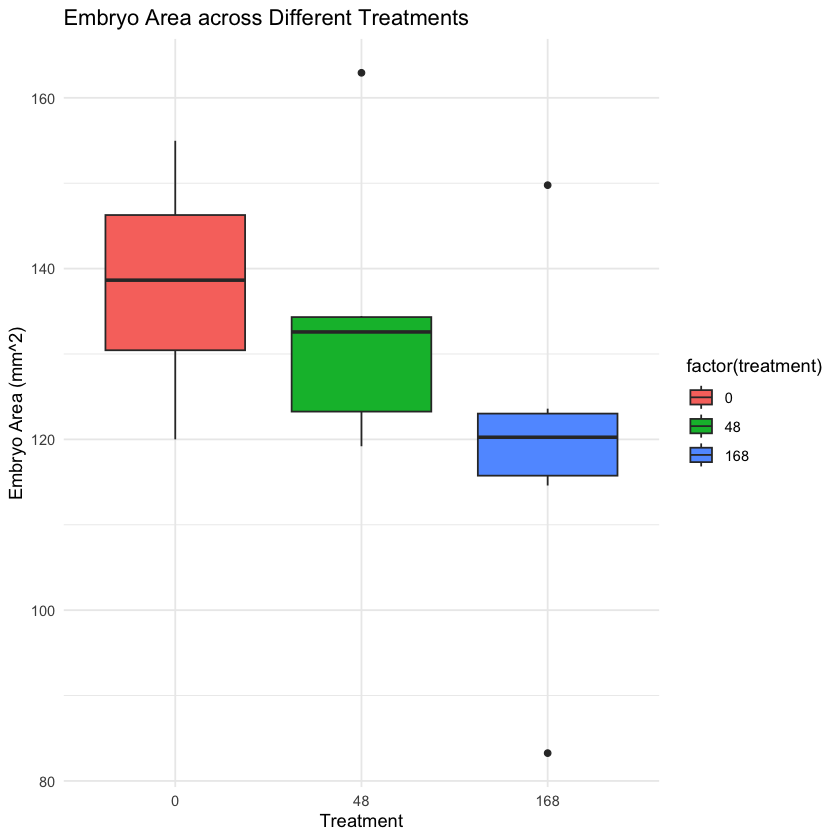

In [48]:
ggplot(data, aes(x=factor(treatment), y=embryo_area_mm2, fill=factor(treatment))) + 
    geom_boxplot() + 
    labs(x="Treatment", y="Embryo Area (mm^2)", title="Embryo Area across Different Treatments") + 
    geom_signif(comparisons = list(c("0", "48"), c("0", "160")), 
              map_signif_level=TRUE) +
    theme_minimal()

### avg embryo weight by treatment  

Warning message:
“Computation failed in `stat_signif()`
Caused by error in `wilcox.test.default()`:
! not enough 'y' observations”


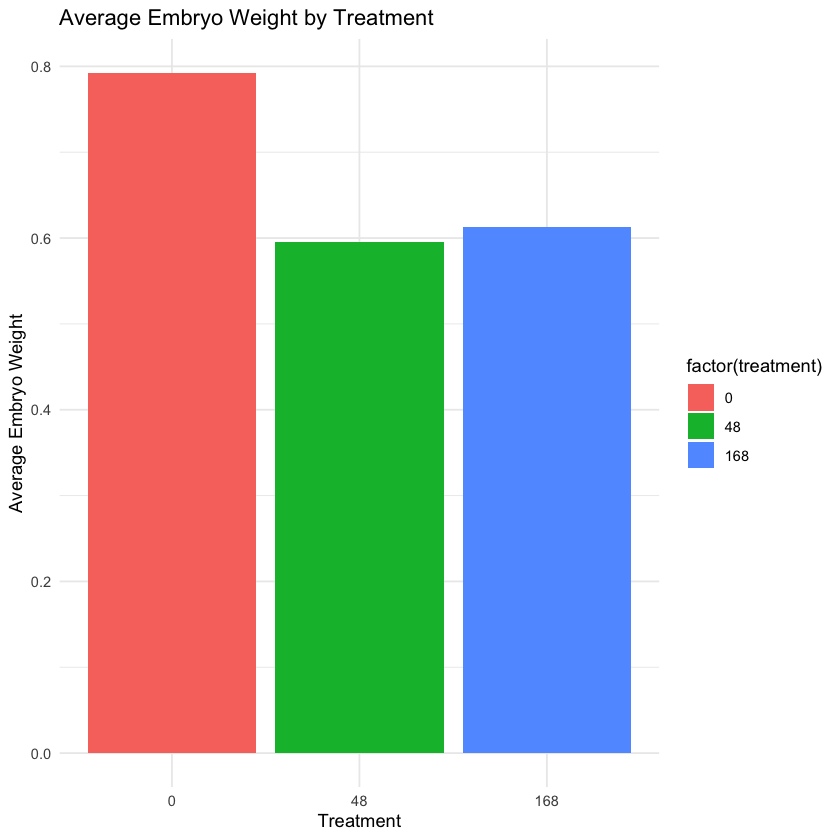

In [49]:
data$weight <- as.numeric(as.character(data$embryo_weight)) 
avg_weight <- aggregate(weight ~ treatment, data, mean, na.rm = TRUE)  
ggplot(avg_weight, aes(x=factor(treatment), y=weight, fill=factor(treatment))) + 
    geom_bar(stat="identity") + 
    labs(x="Treatment", y="Average Embryo Weight", title="Average Embryo Weight by Treatment") +
    geom_signif(comparisons = list(c("0", "48"), c("0", "160")), 
              map_signif_level=TRUE) +
    theme_minimal()

### eye_diameter_mm vs embryo_length_mm colored by type (exculpatory)

Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”


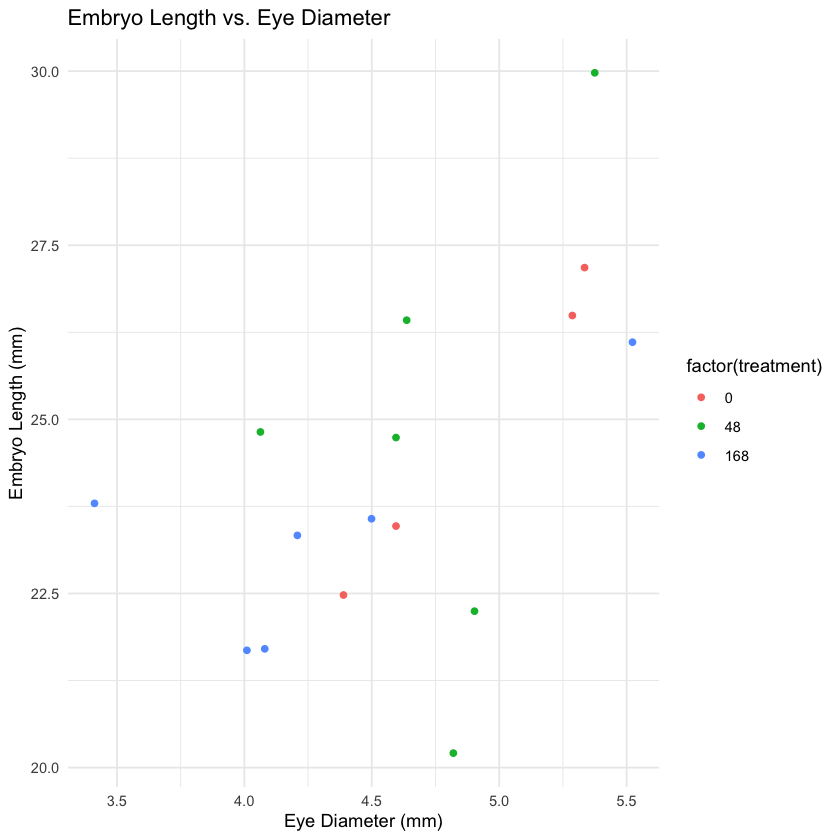

In [50]:
ggplot(data, aes(x=eye_diameter_mm, y=embryo_length_mm, color=factor(treatment))) + 
    geom_point() + 
    labs(x="Eye Diameter (mm)", y="Embryo Length (mm)", title="Embryo Length vs. Eye Diameter") + 
    theme_minimal()

### The ratio of the alive vs dead in bar graph

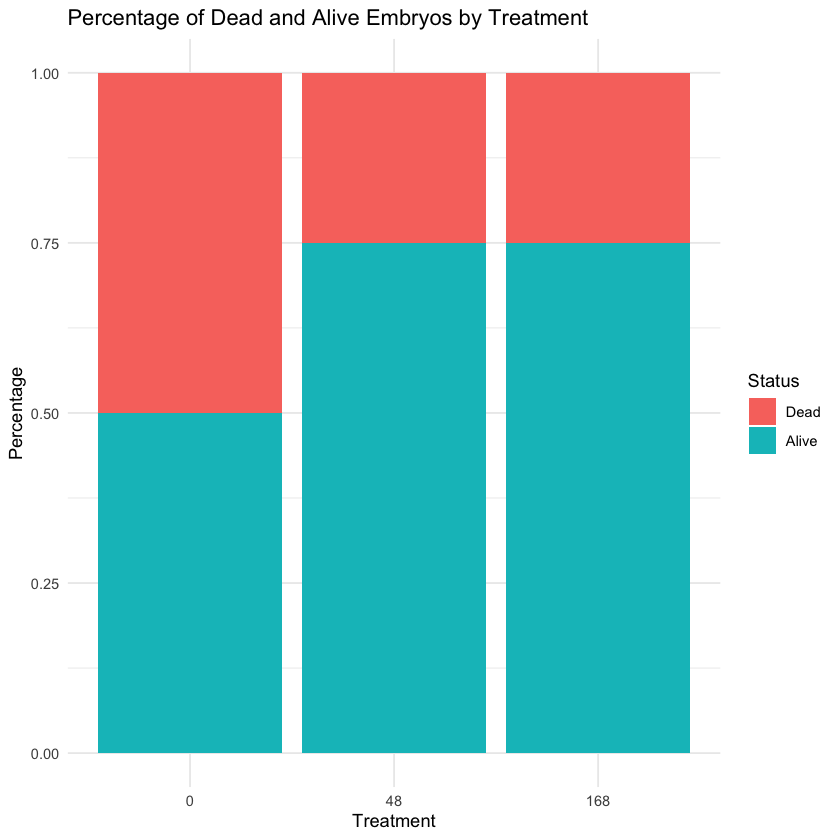

In [51]:
data$alive <- factor(data$alive, levels = c(0, 1), labels = c("Dead", "Alive"))

ggplot(data, aes(x=factor(treatment), fill=alive)) + 
    geom_bar(position = "fill") +  
    scale_y_continuous() + 
    labs(x = "Treatment", y = "Percentage", fill = "Status", 
         title = "Percentage of Dead and Alive Embryos by Treatment") +
    theme_minimal()

### embryo weight bar graph

Warning message:
“Removed 8 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Computation failed in `stat_signif()`
Caused by error in `t.test.default()`:
! not enough 'y' observations”


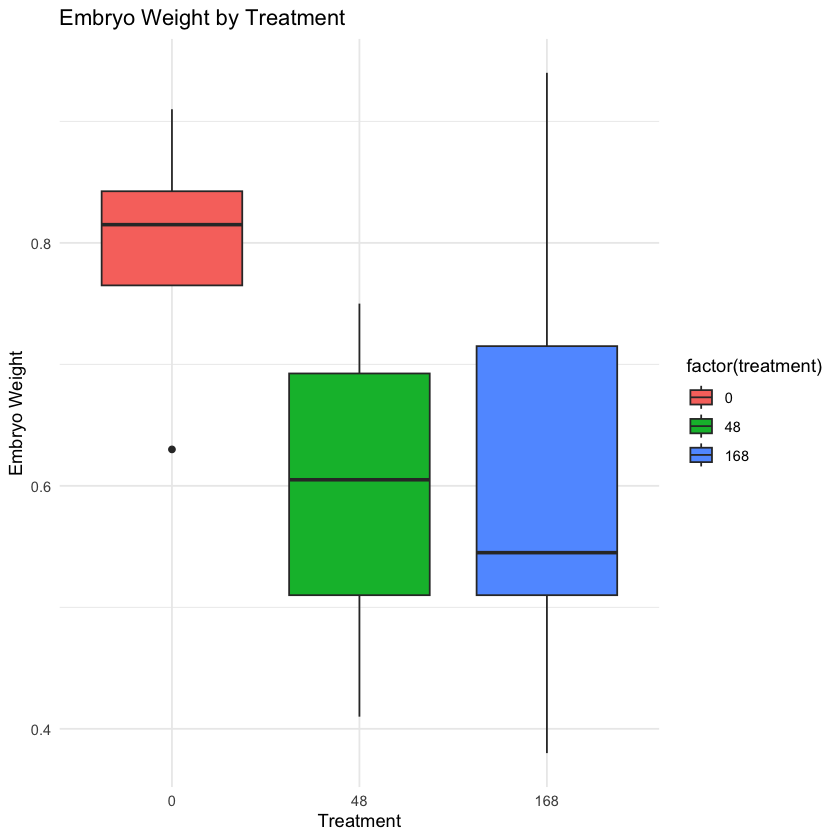

In [52]:
ggplot(data, aes(x=factor(treatment), y=embryo_weight, fill=factor(treatment))) + 
    geom_boxplot() + 
    labs(x="Treatment", y="Embryo Weight", title="Embryo Weight by Treatment") + 
    geom_signif(comparisons = list(c("0", "48"), c("0", "160")), 
              map_signif_level=TRUE, na.rm = TRUE, test = "t.test") +
    theme_minimal()

# Visualization (P0st-stat-sig tests)

In [53]:
# importing the colors
col_eggplant <- "#60495A"
col_sky <- "#96C9DC"
col_brown <- "#CC978E"
col_green <- "#08605F"
col_olive <- "#A2AD59"

In [54]:
data

wk,treatment,egg_label,alive,egg_code,hh_Stage,embryo_area_mm2,eye_diameter_mm,bump_to_beak_length_mm,embryo_length_mm,pre_exp_egg_weight,post_exp_egg_weight,embryo_weight,weight
<dbl>,<fct>,<chr>,<fct>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1A,Dead,1-1A,n/a,NA,NA,NA,NA,NA,57.67,NA,NA
1,0,1B,Alive,1-1B,29,143.374,5.335,11.310,27.179,NA,54.06,0.81,0.81
1,0,1C,Alive,1-1C,29,154.968,5.287,11.873,26.491,NA,51.63,0.91,0.91
1,0,1D,Alive,1-1D,30,120.004,4.595,10.135,23.468,NA,60.08,0.82,0.82
1,48,2A,Alive,1-2A,30,119.195,4.063,9.887,24.819,NA,50.47,0.64,0.64
1,48,2B,Alive,1-2B,30,134.437,4.595,11.206,24.739,NA,48.89,0.57,0.57
1,48,2C,Alive,1-2C,29,162.930,5.375,10.267,29.976,NA,57.04,0.49,0.49
1,48,2D,Alive,1-2D,29,131.186,4.637,9.428,26.424,NA,55.43,0.41,0.41
1,168,3A,Dead,1-3A,n/a,NA,NA,NA,NA,NA,52.33,NA,NA


Warning message:
“Removed 8 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Computation failed in `stat_signif()`
Caused by error in `t.test.default()`:
! not enough 'y' observations”


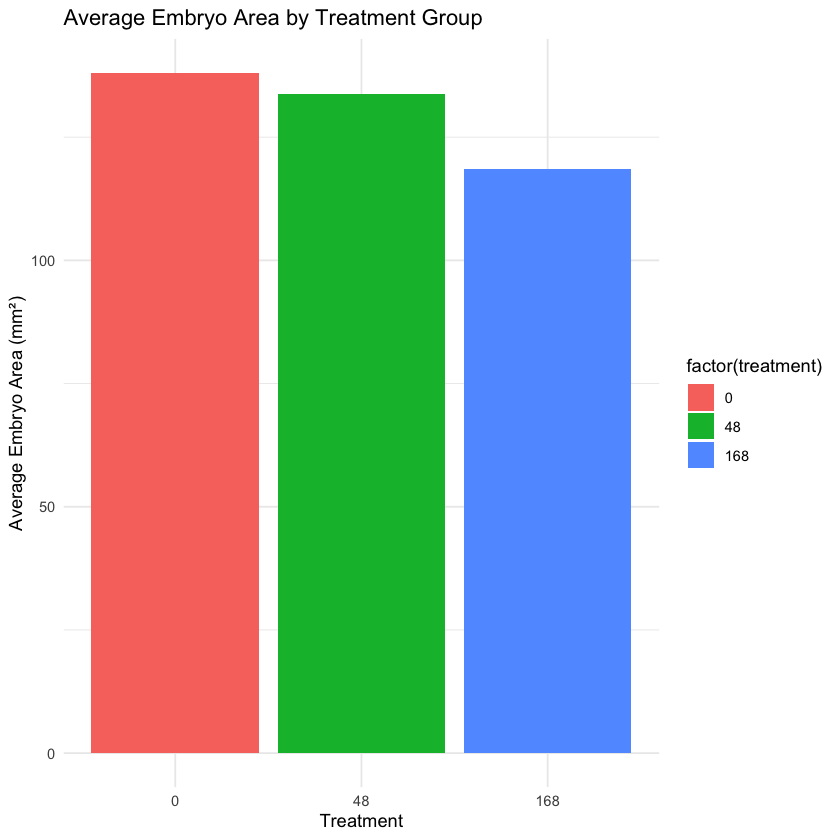

In [55]:
ggplot(data, aes(x=factor(treatment), y=embryo_area_mm2, fill=factor(treatment))) +
  geom_bar(stat="summary", fun=mean) +
  labs(x="Treatment", y="Average Embryo Area (mm²)", title="Average Embryo Area by Treatment Group") +
  theme_minimal() + geom_signif(comparisons = list(c("0", "48"), c("0", "160")), 
              map_signif_level=TRUE, na.rm = TRUE, test = "t.test")

Warning message:
“Removed 8 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Computation failed in `stat_signif()`
Caused by error in `t.test.default()`:
! not enough 'y' observations”


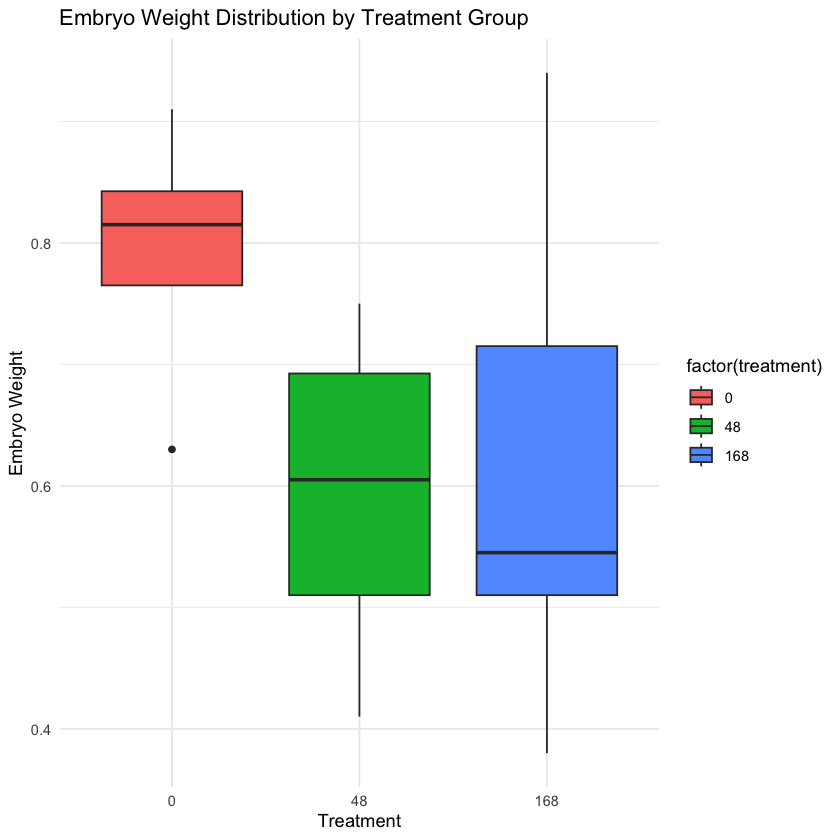

In [56]:
ggplot(data, aes(x=factor(treatment), y=embryo_weight, fill=factor(treatment))) +
  geom_boxplot() +
  labs(x="Treatment", y="Embryo Weight", title="Embryo Weight Distribution by Treatment Group") +
  theme_minimal() + geom_signif(comparisons = list(c("0", "48"), c("0", "160")), 
              map_signif_level=TRUE, na.rm = TRUE, test = "t.test")

Warning message:
“Removed 8 rows containing non-finite values (`stat_bin()`).”


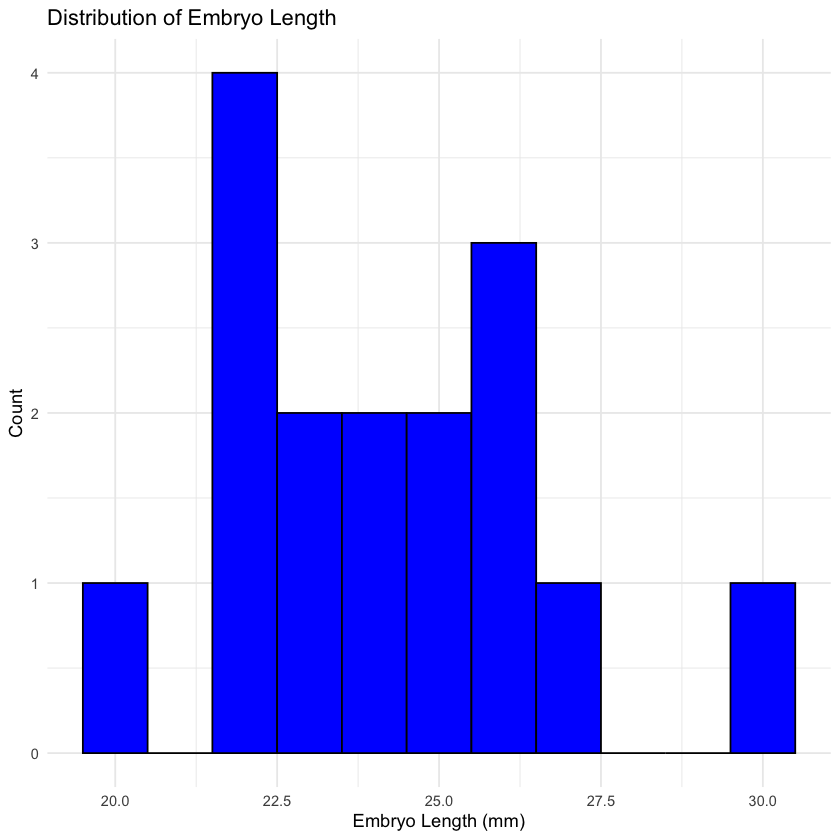

In [57]:
ggplot(data, aes(x=embryo_length_mm)) +
  geom_histogram(binwidth=1, fill="blue", color="black") +
  labs(x="Embryo Length (mm)", y="Count", title="Distribution of Embryo Length") +
  theme_minimal()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Warning message:
“Removed 24 rows containing non-finite values (`stat_summary()`).”


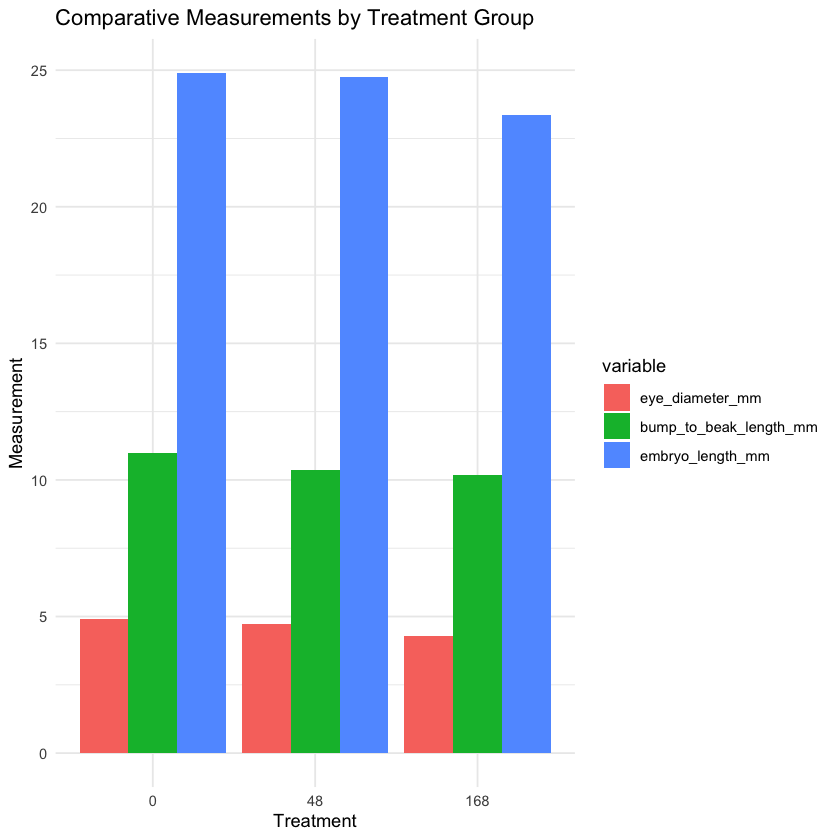

In [58]:
library(reshape2)
data_melted <- melt(data, id.vars = "treatment", measure.vars = c("eye_diameter_mm", "bump_to_beak_length_mm", "embryo_length_mm"))

ggplot(data_melted, aes(x=factor(treatment), y=value, fill=variable)) +
  geom_bar(stat="summary", fun=mean, position="dodge") +
  labs(x="Treatment", y="Measurement", title="Comparative Measurements by Treatment Group") +
  theme_minimal()

Warning message in geom_bar(stat = "summary", fun.y = mean, position = "dodge"):
“Ignoring unknown parameters: `fun.y`”
Warning message:
“Removed 60 rows containing non-finite values (`stat_summary()`).”
No summary function supplied, defaulting to `mean_se()`


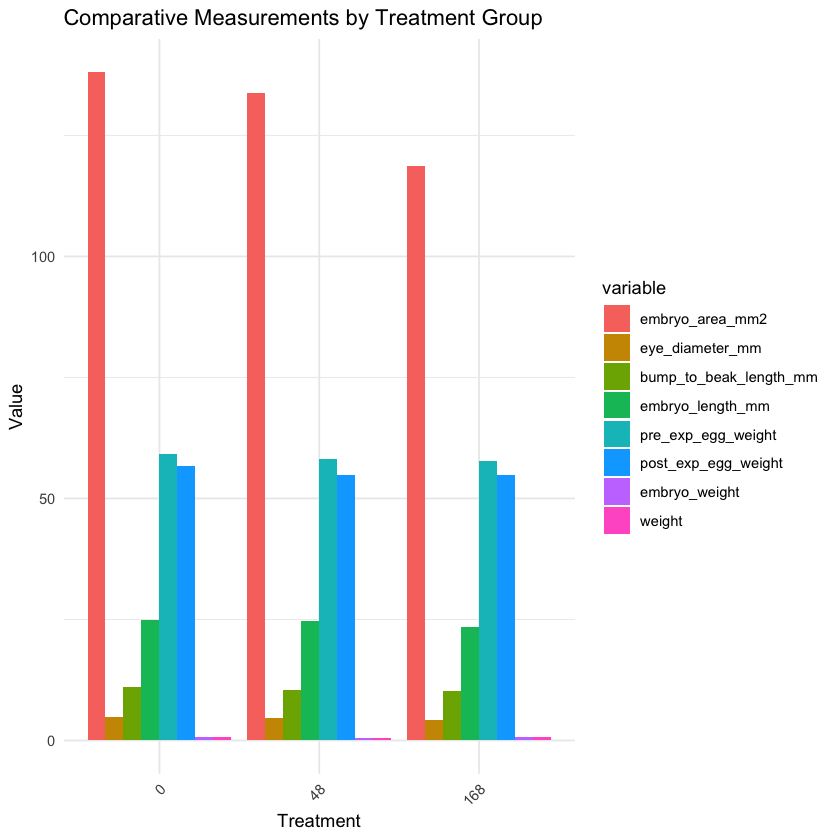

In [59]:
library(ggplot2)
library(reshape2)


data_melted <- melt(data, id.vars = c("wk", "treatment", "egg_label", "alive", "egg_code", "hh_Stage"), 
                    measure.vars = c("embryo_area_mm2", "eye_diameter_mm", "bump_to_beak_length_mm", 
                                     "embryo_length_mm", "pre_exp_egg_weight", "post_exp_egg_weight", 
                                     "embryo_weight", "weight"))


ggplot(data_melted, aes(x=factor(treatment), y=value, fill=variable)) +
  geom_bar(stat="summary", fun.y=mean, position="dodge") +
  labs(x="Treatment", y="Value", title="Comparative Measurements by Treatment Group") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) 


Warning message:
“Removed 60 rows containing non-finite values (`stat_summary()`).”


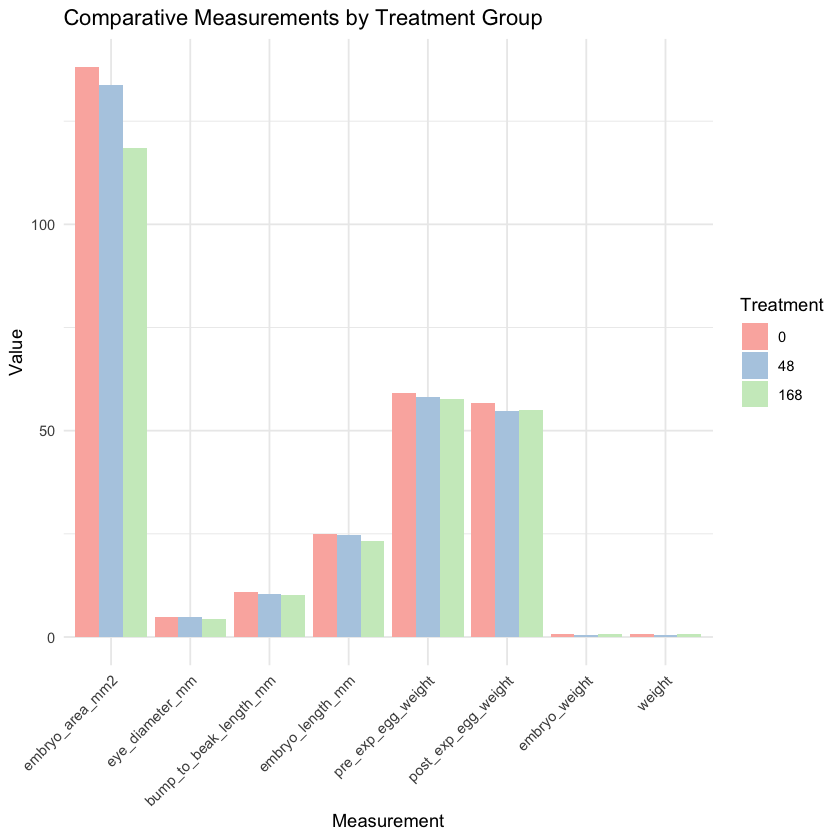

In [60]:
library(ggplot2)
library(reshape2)


data_melted <- melt(data, id.vars = c("treatment", "alive"), measure.vars = c("embryo_area_mm2", "eye_diameter_mm", "bump_to_beak_length_mm", 
                                     "embryo_length_mm", "pre_exp_egg_weight", "post_exp_egg_weight", 
                                     "embryo_weight", "weight"))


ggplot(data_melted, aes(x=variable, y=value, fill=factor(treatment))) +
  geom_bar(stat="summary", fun=mean, position="dodge") +
  labs(x="Measurement", y="Value", title="Comparative Measurements by Treatment Group") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle=45, hjust=1)) + 
  scale_fill_brewer(palette="Pastel1", name="Treatment") 

Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”


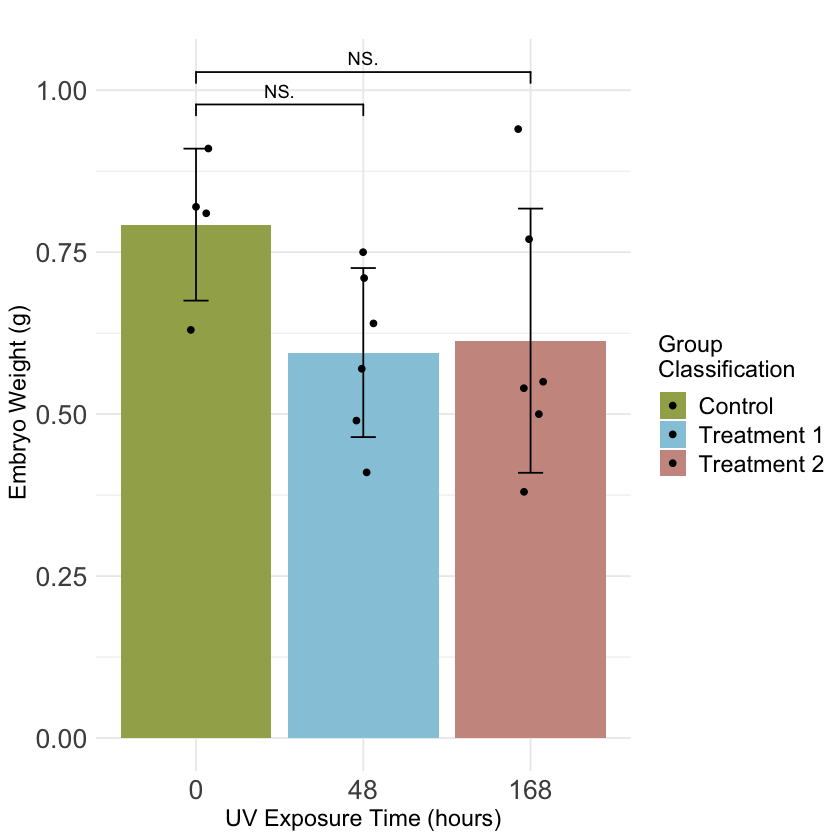

In [92]:
library(ggplot2)


col_eggplant <- "#60495A"
col_sky <- "#96C9DC"
col_brown <- "#CC978E"
col_green <- "#08605F"
col_olive <- "#A2AD59"

data_summary <- data %>%
  group_by(treatment) %>%
  summarise(mean_embryo_weight = mean(embryo_weight, na.rm = TRUE),
            sd_embryo_weight = sd(embryo_weight, na.rm = TRUE),
            lower = mean_embryo_weight - sd_embryo_weight,
            upper = mean_embryo_weight + sd_embryo_weight)

# Creating the bar chart with specified colors, custom x-axis labels, and custom legend title
final_plot <- ggplot(data_summary, aes(x = factor(treatment), y = mean_embryo_weight, fill = treatment)) +
  geom_bar(stat = "identity", position = position_dodge()) + 
  geom_point(data = data, aes(x = factor(treatment), y = embryo_weight, group = treatment), 
             position = position_jitterdodge(jitter.width = 0.4), color = "black") +

  geom_errorbar(aes(ymin = lower, ymax = upper), width = .15, position = position_dodge(.9)) +

  # scale_fill_discrete(name="Experimental\nCondition",
  #                        breaks=c("ctrl", "trt1", "trt2"),
  #                        labels=c("Control", "Treatment 1", "Treatment 2")) +


 geom_signif(comparisons = list(c("0", "48"), c("0", "168")), 
              map_signif_level=TRUE,y_position = c(.95, 1.)) +


  labs(x = "UV Exposure Time (hours)", y = " Embryo Weight (g)", 
       title = "", fill = "Treatment Type") +
  theme_minimal() + 
   scale_fill_manual(values=c(col_olive, col_sky, col_brown), 
                       name="Group\nClassification",
                       # breaks=c("ctrl", "trt1", "trt2"),
                       labels=c("Control", "Treatment 1", "Treatment 2")
                    )  + theme(axis.title.x = element_text(size = 14),   # X-axis label
        axis.title.y = element_text(size = 14),   # Y-axis label
        axis.text.x = element_text(size = 16),    # X-axis ticks
        axis.text.y = element_text(size = 16),    # Y-axis ticks
        legend.title = element_text(size = 14),
        legend.text = element_text(size = 14)                   )  


final_plot
  # scale_fill_manual(values = c(col_green, col_sky, col_brown))

# http://www.cookbook-r.com/Graphs/Legends_(ggplot2)/

**caption for the figure**
---

**Fig 1. Mean weight of embryos in grams after exposure to UV light for different time intervals**. Bars indicate the mean embryo weight (± 95% confidence intervals) in grams for Control (0 hours UV, n = 4), Treatment 1 (48 hours UV, n = 6), and Treatment 2 (168 hours UV, n = 6). Following UV exposure, all groups were incubated in darkness at 37.5°C until completing the total incubation period of 168 hours. Individual samples are represented by black dots. A Mann-Whitney U test indicated no statistical significance between control and treatment groups. 

In [93]:
# save plot
ggsave(final_plot, file="fig_1.png", dpi = 300,
 # width = 80, height = 50, 
       units = "cm")

Saving 17.8 x 17.8 cm image
Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”


# results section body pertaining to fig 1

my writing
---
Post-incubation, a variety of charectersitics were measured such as eye diameter (mm), bump to beak length (mm), embryo length (mm) and more. Statistical hypothesis testing across all these measurement did not reveal any significance. The focus was put on the embryo weight (g) as it had the lowest p-value but not sufficiently low enough for significance. 
Upon Measuring the embryo weight of all the viable samples and averaging them by their respective group, a downward trend was noticed. Control has mean embryo weight of 0.793 grams (Figure. 1). Interestingly, treatment 1 (48 hours of UV exposure) had the 0.595 grams and treatment 2 had 0.613 grams, a drop of approximately 25%. However, given the wide range and overlap of the error bars nothing can be concluded. This is further elucidated by the Mann-Whitney U test was rejected with p-values of 0.06667 and 0.1714 for comparison between the control and treatment 1 (48 hours of UV exposure) and control and treatment 2 (168 hours of exposure), respectively. 

clean-ed up writing
---
After incubation, many feature were measured, including but not limited to eye diameter, bump-to-beak length, and embryo length. Analysis of these measurements revealed no statistically significant changes between control and UV exposure treatment groups. The focus shifted to embryo weight, which had the lowest p-value among the characteristics, though it did not reach statistical significance.

The average embryo weight for viable samples in each group was calculated. The control group showed a mean embryo weight of 0.793 grams (Figure 1). In comparison, Treatment 1 (48 hours of UV exposure) and Treatment 2 (168 hours of UV exposure) had mean weights of 0.595 grams and 0.613 grams, respectively, indicating a noticable reduction of approximately 25%. However, the overlap in error bars suggests that these differences are not statistically significant. This is supported by the Mann-Whitney U test results, which did not demonstrate significant differences, with p-values of 0.06667 for the control versus Treatment 1 comparison and 0.1714 for the control versus Treatment 2 comparison.

In [95]:
data_summary

treatment,mean_embryo_weight,sd_embryo_weight,lower,upper
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.7925000,0.1172959,0.6752041,0.9097959
48,0.5950000,0.1304990,0.4645010,0.7254990
168,0.6133333,0.2039281,0.4094052,0.8172614


In [96]:
wilcox.test(control$embryo_weight, treatment1$embryo_weight, paired = FALSE)
wilcox.test(control$embryo_weight, treatment2$embryo_weight, paired = FALSE)


	Wilcoxon rank sum exact test

data:  control$embryo_weight and treatment1$embryo_weight
W = 21, p-value = 0.06667
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  control$embryo_weight and treatment2$embryo_weight
W = 19, p-value = 0.1714
alternative hypothesis: true location shift is not equal to 0


In [97]:
colnames(data)

[1] "wk"                     "treatment"              "egg_label"             
 [4] "alive"                  "egg_code"               "hh_Stage"              
 [7] "embryo_area_mm2"        "eye_diameter_mm"        "bump_to_beak_length_mm"
[10] "embryo_length_mm"       "pre_exp_egg_weight"     "post_exp_egg_weight"   
[13] "embryo_weight"          "weight"